#**Breef**
The dataset includes network traffic details such as frame
- information (encap_type	, time, time_epoch, number, len, cap_len)
- IP headers  (version, hdr_len, tos	,id	,flags	,flags.rb	,flags.df	,flags.mf	,frag_offset	,ttl	,proto	,checksum	,src	,dst	,len	,dsfield)
- TCP header details. ( srcport	, dstport	, seq	, ack	, len	, hdr_len	, flags	, flags.fin	, flags.syn	, flags.reset	, flags.push	, flags.ack	, flags.urg	, flags.cwr	, window_size	, checksum	, urgent_pointer	, options.mss_val)

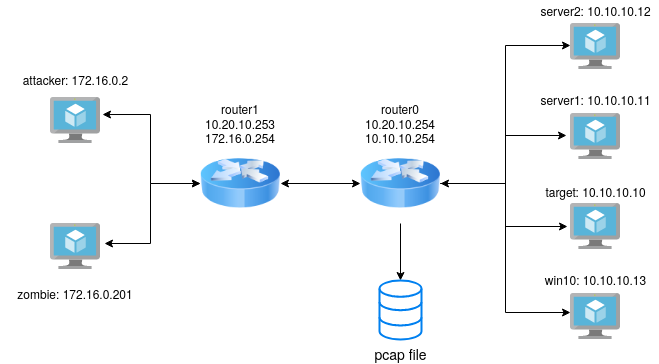

 ## **PCAP**
(Packet Capture) file is a data file used to store network traffic captured by packet sniffers or network monitoring tools, such as Wireshark or tcpdump.
### The PCAP file format typically includes information such as:

- Timestamp: The time when the packet was captured.
- Packet Data: The actual data of the packet, including headers and payload

## **Zombie**
 is a device that has been compromised by malware and is being controlled remotely by an attacker without the user's knowledge.

# **Import library**

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier


In [39]:
data_train=pd.read_csv('/content/attack_dataset.csv')

data_labels=pd.read_csv('/content/attack_labels.csv')


In [40]:
data_labels.head()


,ip,label
0,172.16.0.3,nmap_tcp_syn
1,172.16.0.4,nmap_tcp_conn
2,172.16.0.5,nmap_tcp_null
3,172.16.0.6,nmap_tcp_xmas
4,172.16.0.7,nmap_tcp_fin


In [41]:
pd.set_option('display.max_columns', None)  # Show all columns
data_train.head()  # Display the first few rows of the dataset

,frame_info.encap_type,frame_info.time,frame_info.time_epoch,frame_info.number,frame_info.len,frame_info.cap_len,eth.type,ip.version,ip.hdr_len,ip.tos,ip.id,ip.flags,ip.flags.rb,ip.flags.df,ip.flags.mf,ip.frag_offset,ip.ttl,ip.proto,ip.checksum,ip.src,ip.dst,ip.len,ip.dsfield,tcp.srcport,tcp.dstport,tcp.seq,tcp.ack,tcp.len,tcp.hdr_len,tcp.flags,tcp.flags.fin,tcp.flags.syn,tcp.flags.reset,tcp.flags.push,tcp.flags.ack,tcp.flags.urg,tcp.flags.cwr,tcp.window_size,tcp.checksum,tcp.urgent_pointer,tcp.options.mss_val
0,1,"Dec 31, 1969 21:03:41.953641000 -03",221.953641,20,58,58,0x00000800,4,20,NaN,0x0000b2c5,0x00000000,0,0,0,0,46,6,0x000019e0,172.16.0.3,10.10.10.10,44,0x00000000,62218,8888,0,0,0,24,0x00000002,0,1,0,0,0,0,0,1024,0x00005cb1,0,1460.0
1,1,"Dec 31, 1969 21:03:41.953762000 -03",221.953762,21,58,58,0x00000800,4,20,NaN,0x0000d3a4,0x00000000,0,0,0,0,37,6,0x00000201,172.16.0.3,10.10.10.10,44,0x00000000,62218,587,0,0,0,24,0x00000002,0,1,0,0,0,0,0,1024,0x00007d1e,0,1460.0
2,1,"Dec 31, 1969 21:03:41.953792000 -03",221.953792,22,58,58,0x00000800,4,20,NaN,0x00003084,0x00000000,0,0,0,0,55,6,0x00009321,172.16.0.3,10.10.10.10,44,0x00000000,62218,995,0,0,0,24,0x00000002,0,1,0,0,0,0,0,1024,0x00007b86,0,1460.0
3,1,"Dec 31, 1969 21:03:41.953817000 -03",221.953817,23,58,58,0x00000800,4,20,NaN,0x000090b5,0x00000000,0,0,0,0,37,6,0x000044f0,172.16.0.3,10.10.10.10,44,0x00000000,62218,1723,0,0,0,24,0x00000002,0,1,0,0,0,0,0,1024,0x000078ae,0,1460.0
4,1,"Dec 31, 1969 21:03:41.953854000 -03",221.953854,24,58,58,0x00000800,4,20,NaN,0x00007d93,0x00000000,0,0,0,0,57,6,0x00004412,172.16.0.3,10.10.10.10,44,0x00000000,62218,3306,0,0,0,24,0x00000002,0,1,0,0,0,0,0,1024,0x0000727f,0,1460.0


In [42]:
# Merge the datasets on the common column
df_merged = data_train.merge(data_labels, how='inner', left_on='ip.src', right_on='ip')

# Display information about the merged dataset
print("Shape of merged dataset:", df_merged.shape)
df_merged.head()

Shape of merged dataset: (37069, 43)


,frame_info.encap_type,frame_info.time,frame_info.time_epoch,frame_info.number,frame_info.len,frame_info.cap_len,eth.type,ip.version,ip.hdr_len,ip.tos,ip.id,ip.flags,ip.flags.rb,ip.flags.df,ip.flags.mf,ip.frag_offset,ip.ttl,ip.proto,ip.checksum,ip.src,ip.dst,ip.len,ip.dsfield,tcp.srcport,tcp.dstport,tcp.seq,tcp.ack,tcp.len,tcp.hdr_len,tcp.flags,tcp.flags.fin,tcp.flags.syn,tcp.flags.reset,tcp.flags.push,tcp.flags.ack,tcp.flags.urg,tcp.flags.cwr,tcp.window_size,tcp.checksum,tcp.urgent_pointer,tcp.options.mss_val,ip,label
0,1,"Dec 31, 1969 21:03:41.953641000 -03",221.953641,20,58,58,0x00000800,4,20,NaN,0x0000b2c5,0x00000000,0,0,0,0,46,6,0x000019e0,172.16.0.3,10.10.10.10,44,0x00000000,62218,8888,0,0,0,24,0x00000002,0,1,0,0,0,0,0,1024,0x00005cb1,0,1460.0,172.16.0.3,nmap_tcp_syn
1,1,"Dec 31, 1969 21:03:41.953762000 -03",221.953762,21,58,58,0x00000800,4,20,NaN,0x0000d3a4,0x00000000,0,0,0,0,37,6,0x00000201,172.16.0.3,10.10.10.10,44,0x00000000,62218,587,0,0,0,24,0x00000002,0,1,0,0,0,0,0,1024,0x00007d1e,0,1460.0,172.16.0.3,nmap_tcp_syn
2,1,"Dec 31, 1969 21:03:41.953792000 -03",221.953792,22,58,58,0x00000800,4,20,NaN,0x00003084,0x00000000,0,0,0,0,55,6,0x00009321,172.16.0.3,10.10.10.10,44,0x00000000,62218,995,0,0,0,24,0x00000002,0,1,0,0,0,0,0,1024,0x00007b86,0,1460.0,172.16.0.3,nmap_tcp_syn
3,1,"Dec 31, 1969 21:03:41.953817000 -03",221.953817,23,58,58,0x00000800,4,20,NaN,0x000090b5,0x00000000,0,0,0,0,37,6,0x000044f0,172.16.0.3,10.10.10.10,44,0x00000000,62218,1723,0,0,0,24,0x00000002,0,1,0,0,0,0,0,1024,0x000078ae,0,1460.0,172.16.0.3,nmap_tcp_syn
4,1,"Dec 31, 1969 21:03:41.953854000 -03",221.953854,24,58,58,0x00000800,4,20,NaN,0x00007d93,0x00000000,0,0,0,0,57,6,0x00004412,172.16.0.3,10.10.10.10,44,0x00000000,62218,3306,0,0,0,24,0x00000002,0,1,0,0,0,0,0,1024,0x0000727f,0,1460.0,172.16.0.3,nmap_tcp_syn


# **Data preperation**

In [43]:
def summary(df):
    summary_df = pd.DataFrame(df.dtypes, columns=['dtypes'])
    summary_df['missing_value'] = df.isna().sum()
    summary_df['unique'] = df.nunique().values
    summary_df['count'] = df.count().values
    return summary_df

summary(data_train).style.background_gradient(cmap='Purples')
summary(df_merged).style.background_gradient(cmap='Purples')

,dtypes,missing_value,unique,count
frame_info.encap_type,int64,0,1,37069
frame_info.time,object,0,36902,37069
frame_info.time_epoch,float64,0,36902,37069
frame_info.number,int64,0,37069,37069
frame_info.len,int64,0,8,37069
frame_info.cap_len,int64,0,8,37069
eth.type,object,0,1,37069
ip.version,int64,0,1,37069
ip.hdr_len,int64,0,1,37069
ip.tos,float64,37069,0,0


In [44]:
print(f"dataframe is sum duplicated:-\n df: {df_merged.duplicated().sum()}")

dataframe is sum duplicated:-
 df: 0


In [45]:
df_merged.describe()

,frame_info.encap_type,frame_info.time_epoch,frame_info.number,frame_info.len,frame_info.cap_len,ip.version,ip.hdr_len,ip.tos,ip.flags.rb,ip.flags.df,ip.flags.mf,ip.frag_offset,ip.ttl,ip.proto,ip.len,tcp.srcport,tcp.dstport,tcp.seq,tcp.ack,tcp.len,tcp.hdr_len,tcp.flags.fin,tcp.flags.syn,tcp.flags.reset,tcp.flags.push,tcp.flags.ack,tcp.flags.urg,tcp.flags.cwr,tcp.window_size,tcp.urgent_pointer,tcp.options.mss_val
count,37069.0,37069.000000,37069.000000,37069.000000,37069.000000,37069.0,37069.0,0.0,37069.0,37069.000000,37069.0,37069.000000,37069.000000,37069.0,37069.000000,37069.000000,37069.000000,37069.00000,3.706900e+04,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.0,23748.00000
mean,1.0,6241.290188,113227.752785,59.304082,59.304082,4.0,20.0,NaN,0.0,0.280531,0.0,0.298740,63.837061,6.0,45.304082,39679.786749,7284.219590,0.40136,1.161921e+08,0.001538,27.692465,0.217055,0.598694,0.048477,0.108770,0.163614,0.108689,0.026977,10778.944994,0.0,1452.82668
std,0.0,5313.270492,109884.567471,11.818566,11.818566,0.0,0.0,NaN,0.0,0.449265,0.0,0.712915,46.103708,0.0,11.818566,19760.352276,13403.537682,0.49029,3.920063e+08,0.170922,9.458339,0.412246,0.490169,0.214775,0.311355,0.369930,0.311253,0.162018,19687.800173,0.0,10.98673
min,1.0,221.953641,20.000000,38.000000,38.000000,4.0,20.0,NaN,0.0,0.000000,0.0,0.000000,35.000000,6.0,24.000000,22.000000,0.000000,0.00000,0.000000e+00,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1436.00000
25%,1.0,245.743854,18546.000000,54.000000,54.000000,4.0,20.0,NaN,0.0,0.000000,0.0,0.000000,45.000000,6.0,40.000000,33737.000000,562.000000,0.00000,0.000000e+00,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1024.000000,0.0,1436.00000
50%,1.0,6276.994506,36759.000000,54.000000,54.000000,4.0,20.0,NaN,0.0,0.000000,0.0,0.000000,56.000000,6.0,40.000000,43234.000000,1935.000000,0.00000,0.000000e+00,0.000000,24.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1024.000000,0.0,1460.00000
75%,1.0,12158.303539,238378.000000,74.000000,74.000000,4.0,20.0,NaN,0.0,1.000000,0.0,0.000000,62.000000,6.0,60.000000,56714.000000,6881.000000,1.00000,1.000000e+00,0.000000,40.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16384.000000,0.0,1460.00000
max,1.0,12168.581720,283751.000000,78.000000,78.000000,4.0,20.0,NaN,0.0,1.000000,0.0,2.000000,253.000000,6.0,64.000000,65529.000000,65535.000000,2.00000,4.127085e+09,19.000000,44.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,65535.000000,0.0,1460.00000


In [46]:
# show columns values
for col in data_train.columns:
    print(df_merged[col].value_counts(),"\n")

frame_info.encap_type
1    37069
Name: count, dtype: int64 

frame_info.time
Jan  1, 1970 00:22:30.768935000 -03    50
Jan  1, 1970 00:22:43.072933000 -03    21
Jan  1, 1970 00:22:34.544935000 -03    18
Jan  1, 1970 00:22:45.280934000 -03    18
Dec 31, 1969 21:03:47.680936000 -03    15
                                       ..
Dec 31, 1969 21:04:46.981978000 -03     1
Dec 31, 1969 21:04:46.985306000 -03     1
Dec 31, 1969 21:04:46.988619000 -03     1
Dec 31, 1969 21:04:46.991939000 -03     1
Dec 31, 1969 21:04:46.961985000 -03     1
Name: count, Length: 36902, dtype: int64 

frame_info.time_epoch
12150.768935    50
12163.072933    21
12154.544935    18
12165.280934    18
227.680936      15
                ..
286.981978       1
286.985306       1
286.988619       1
286.991939       1
286.961985       1
Name: count, Length: 36902, dtype: int64 

frame_info.number
283751    1
20        1
21        1
22        1
23        1
         ..
51        1
54        1
55        1
56        1
57    

In [47]:
#drop column is NAN
data_train=df_merged.dropna(axis=1)


print(f"dataframe is sum missing value:-\n df: {df_merged.isna().sum()}")

dataframe is sum missing value:-
 df: frame_info.encap_type        0
frame_info.time              0
frame_info.time_epoch        0
frame_info.number            0
frame_info.len               0
frame_info.cap_len           0
eth.type                     0
ip.version                   0
ip.hdr_len                   0
ip.tos                   37069
ip.id                        0
ip.flags                     0
ip.flags.rb                  0
ip.flags.df                  0
ip.flags.mf                  0
ip.frag_offset               0
ip.ttl                       0
ip.proto                     0
ip.checksum                  0
ip.src                       0
ip.dst                       0
ip.len                       0
ip.dsfield                   0
tcp.srcport                  0
tcp.dstport                  0
tcp.seq                      0
tcp.ack                      0
tcp.len                      0
tcp.hdr_len                  0
tcp.flags                    0
tcp.flags.fin                0
t

In [48]:
from sklearn.preprocessing import LabelEncoder

def label_encode_columns(dataframe):
    # Create a LabelEncoder object
    encoder = LabelEncoder()

    # Apply label encoding to each object-type column
    for column in dataframe.select_dtypes(include=['object']).columns:
        dataframe[column] = encoder.fit_transform(dataframe[column])

    return dataframe
df_merged=label_encode_columns(df_merged)


In [49]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37069 entries, 0 to 37068
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   frame_info.encap_type  37069 non-null  int64  
 1   frame_info.time        37069 non-null  int64  
 2   frame_info.time_epoch  37069 non-null  float64
 3   frame_info.number      37069 non-null  int64  
 4   frame_info.len         37069 non-null  int64  
 5   frame_info.cap_len     37069 non-null  int64  
 6   eth.type               37069 non-null  int64  
 7   ip.version             37069 non-null  int64  
 8   ip.hdr_len             37069 non-null  int64  
 9   ip.tos                 0 non-null      float64
 10  ip.id                  37069 non-null  int64  
 11  ip.flags               37069 non-null  int64  
 12  ip.flags.rb            37069 non-null  int64  
 13  ip.flags.df            37069 non-null  int64  
 14  ip.flags.mf            37069 non-null  int64  
 15  ip

In [50]:
df_merged=df_merged.drop(['eth.type','ip.id','ip.flags', 'ip.checksum' ,'tcp.checksum','frame_info.time','ip.tos',"tcp.options.mss_val"],axis=1)

In [51]:
x=df_merged.drop('label',axis=1)
y=df_merged['label']

In [52]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,train_size=0.8,random_state=42)

In [53]:
Classifiers ={"RandomForest": RandomForestClassifier() ,
"GradientBoosting": GradientBoostingClassifier(),
"AdaBoost":AdaBoostClassifier() }

for Classif in Classifiers:
  clf = Classifiers [Classif]
  clf. fit (X_train, Y_train)
  Y_pred = clf. predict (X_test)

  # Calculate evaluation metrics
  accuracy = accuracy_score (Y_test, Y_pred)


  precision = precision_score(Y_test, Y_pred, average='weighted')
  recall = recall_score(Y_test, Y_pred, average='weighted')
  f1 = f1_score(Y_test, Y_pred, average='weighted')
  conf_matrix = confusion_matrix(Y_test, Y_pred)

  # Print the results
  print("Accuracy:", accuracy)
  print("Precision:", precision)
  print("Recall:", recall)
  print("F1-score:", f1)
  print("Confusion Matrix:\n",conf_matrix)

Accuracy: 0.9998651200431616
Precision: 0.9999100800287745
Recall: 0.9998651200431616
F1-score: 0.999878429152961
Confusion Matrix:
 [[205   0   0 ...   0   0   0]
 [  0 221   0 ...   0   0   0]
 [  0   0 184 ...   0   0   0]
 ...
 [  0   0   0 ... 213   0   0]
 [  0   0   0 ...   0 192   0]
 [  0   0   0 ...   0   0 249]]
Accuracy: 0.9998651200431616
Precision: 0.9998654806847573
Recall: 0.9998651200431616
F1-score: 0.999865025557193
Confusion Matrix:
 [[205   0   0 ...   0   0   0]
 [  0 221   0 ...   0   0   0]
 [  0   0 184 ...   0   0   0]
 ...
 [  0   0   0 ... 213   0   0]
 [  0   0   0 ...   0 192   0]
 [  0   0   0 ...   0   0 249]]
Accuracy: 0.10682492581602374
Precision: 0.039235191977622215
Recall: 0.10682492581602374
F1-score: 0.04946028757181168
Confusion Matrix:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
